In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### CPIデータの前処理

In [34]:
CPI_raw_data = pd.read_csv("CPI-19602022.csv")
CPI_raw_data.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Consumer price index (2010 = 100),FP.CPI.TOTL,Afghanistan,AFG,..,..,..,..,..,..,...,127.7952231,133.7683667,132.8832092,138.7086655,145.6107414,146.5224819,149.8959752,..,..,..
1,Consumer price index (2010 = 100),FP.CPI.TOTL,Albania,ALB,..,..,..,..,..,..,...,107.5751604,109.3241873,111.3971641,112.8179589,115.0592696,117.3927402,119.0492584,120.9789119,123.448662,131.7508348
2,Consumer price index (2010 = 100),FP.CPI.TOTL,Algeria,DZA,..,..,..,..,..,..,...,117.5218381,120.9498642,126.7366464,134.8448702,142.3842032,148.4639947,151.3616678,155.0172502,166.2188945,181.619932
3,Consumer price index (2010 = 100),FP.CPI.TOTL,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Consumer price index (2010 = 100),FP.CPI.TOTL,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [59]:
# CPIデータのうち、JPNのみ抽出
CPI_data = CPI_raw_data.copy()
country = "JPN"
CPI_data = CPI_data[CPI_data["Country Code"] == country]
CPI_data.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
98,Consumer price index (2010 = 100),FP.CPI.TOTL,Japan,JPN,18.9725686,19.9911037,21.35758367,22.79001663,23.65612602,25.23067563,...,100.0175778,102.7772895,103.5946564,103.462823,103.9637898,104.99209,105.4842679,105.4579012,105.2118123,107.8396906


In [60]:
# CPIの数値が入るカラムのみを抽出
CPI_data = CPI_data.iloc[:, 4:]

In [61]:
CPI_data

,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
98,18.9725686,19.9911037,21.35758367,22.79001663,23.65612602,25.23067563,26.50251161,27.55992156,29.0314651,30.55556503,...,100.0175778,102.7772895,103.5946564,103.462823,103.9637898,104.99209,105.4842679,105.4579012,105.2118123,107.8396906


In [62]:
# x軸に使用する年をカラムから取得する
column_values = CPI_data.columns.values
column_values = [int(i[:4]) for i in column_values]
column_values

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [63]:
CPI_data.columns = column_values
CPI_data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
98,18.9725686,19.9911037,21.35758367,22.79001663,23.65612602,25.23067563,26.50251161,27.55992156,29.0314651,30.55556503,...,100.0175778,102.7772895,103.5946564,103.462823,103.9637898,104.99209,105.4842679,105.4579012,105.2118123,107.8396906


C:\Users\user\AppData\Local\Temp\ipykernel_13544\904016116.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  CPI_data_numeric = CPI_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


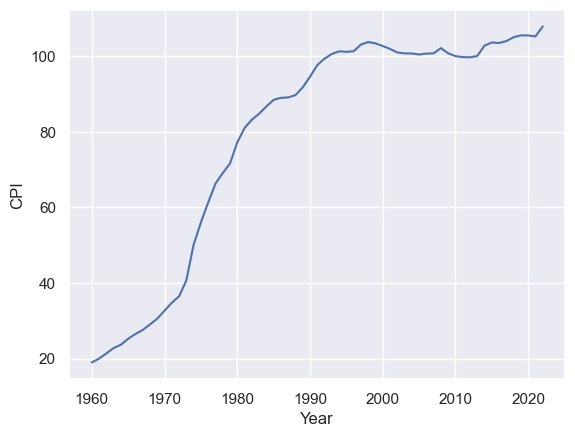

In [64]:
x = column_values

CPI_data_numeric = CPI_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
y = CPI_data_numeric.mean(axis=0)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set_xlabel('Year')
ax.set_ylabel('CPI')
plt.show()

### 通貨データの前処理

In [10]:
currency_raw_data = pd.read_csv("currency_exchange_rates.csv")
currency_raw_data.head()

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,CNY,IDR,MYR,PHP,THB,RON,BRL,MXN,INR,ILS
0,2000-01-03,0.991080,1.0,101.833499,0.571556,35.741328,7.374034,15.507037,0.619029,252.259663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,0.970403,1.0,102.746240,0.560408,35.196507,7.222610,15.183503,0.610966,246.986900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,0.964506,1.0,103.530093,0.557292,35.047261,7.180170,15.091242,0.609954,245.476466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,0.962649,1.0,104.659222,0.556508,34.889295,7.166057,15.062187,0.606662,244.946092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,0.972384,1.0,105.105018,0.561620,35.032089,7.238040,15.214508,0.608907,247.598211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
### 各年度の最後の値のみ取得
### 手順："Date"カラムをdatetime型へ変換⇒"Year"カラムと"Month"カラムを作成する
### ⇒"Month"で3月分のみをソートして、groupbyで各年毎い集計して"Date"の最大値を取得する（これが各月の最終日になる）
### ⇒最初のraw_dataから先ほどのmarch_final_daysの日付と合致する行のみisinメソッドで取得する

currency_raw_data['Date'] = pd.to_datetime(currency_raw_data['Date'])
currency_raw_data['Year'] = currency_raw_data['Date'].dt.year
currency_raw_data['Month'] = currency_raw_data['Date'].dt.month
march_final_days = currency_raw_data[currency_raw_data['Month'] == 3].groupby(['Year', 'Month'])['Date'].max().reset_index()
final_data = currency_raw_data[currency_raw_data['Date'].isin(march_final_days['Date'])]
final_data = final_data.drop_duplicates()
final_data

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,MYR,PHP,THB,RON,BRL,MXN,INR,ILS,Year,Month
88,2000-03-31,1.046792,1.0,103.140375,0.601675,37.917932,7.794410,16.378729,0.626505,270.470009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,3
452,2001-03-30,1.132246,1.0,125.384964,0.655423,39.121377,8.449615,17.715806,0.701087,301.992754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,3
815,2002-03-28,1.146263,1.0,132.404860,0.659755,35.549060,8.520862,17.935122,0.702659,279.160935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,3
1183,2003-03-31,0.917852,1.0,118.568151,0.536062,29.322625,6.816338,14.361267,0.632951,226.112896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,3
1549,2004-03-31,0.818063,1.0,103.869437,0.479548,26.859457,6.090314,12.799902,0.544748,203.902160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,3
1914,2005-03-31,0.771367,1.0,106.788028,0.450941,23.106294,5.746297,12.069269,0.531086,190.681888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,3
2279,2006-03-31,0.826173,1.0,117.663582,0.475876,23.624422,6.165235,12.926801,0.575347,219.547257,...,3.683080,51.130205,38.836748,2.907964,NaN,NaN,NaN,NaN,2006,3
2643,2007-03-30,0.750863,1.0,118.125845,0.436026,21.031686,5.594534,11.748461,0.510437,186.063974,...,3.457501,48.205436,32.329929,2.518922,NaN,NaN,NaN,NaN,2007,3
3010,2008-03-31,0.632431,1.0,99.525677,NaN,16.022641,4.715912,9.895396,0.503289,164.071591,...,3.198520,41.560207,31.484948,2.356944,1.742601,10.687010,NaN,NaN,2008,3
3375,2009-03-31,0.751428,1.0,98.564773,NaN,20.580102,5.596784,11.757289,0.699429,231.574992,...,3.645476,48.331830,35.484671,3.184926,2.311918,14.098512,50.640216,NaN,2009,3


In [46]:
# 年度の付与
def calculate_fiscal_year_corrected(row):
    return row['Year'] - 1

final_data['Fiscal Year'] = final_data.apply(calculate_fiscal_year_corrected, axis=1)
final_data

,Date,EUR,USD,JPY,CYP,CZK,DKK,EEK,GBP,HUF,...,PHP,THB,RON,BRL,MXN,INR,ILS,Year,Month,Fiscal Year
88,2000-03-31,1.046792,1.0,103.140375,0.601675,37.917932,7.794410,16.378729,0.626505,270.470009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,3,1999
452,2001-03-30,1.132246,1.0,125.384964,0.655423,39.121377,8.449615,17.715806,0.701087,301.992754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,3,2000
815,2002-03-28,1.146263,1.0,132.404860,0.659755,35.549060,8.520862,17.935122,0.702659,279.160935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,3,2001
1183,2003-03-31,0.917852,1.0,118.568151,0.536062,29.322625,6.816338,14.361267,0.632951,226.112896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,3,2002
1549,2004-03-31,0.818063,1.0,103.869437,0.479548,26.859457,6.090314,12.799902,0.544748,203.902160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,3,2003
1914,2005-03-31,0.771367,1.0,106.788028,0.450941,23.106294,5.746297,12.069269,0.531086,190.681888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,3,2004
2279,2006-03-31,0.826173,1.0,117.663582,0.475876,23.624422,6.165235,12.926801,0.575347,219.547257,...,51.130205,38.836748,2.907964,NaN,NaN,NaN,NaN,2006,3,2005
2643,2007-03-30,0.750863,1.0,118.125845,0.436026,21.031686,5.594534,11.748461,0.510437,186.063974,...,48.205436,32.329929,2.518922,NaN,NaN,NaN,NaN,2007,3,2006
3010,2008-03-31,0.632431,1.0,99.525677,NaN,16.022641,4.715912,9.895396,0.503289,164.071591,...,41.560207,31.484948,2.356944,1.742601,10.687010,NaN,NaN,2008,3,2007
3375,2009-03-31,0.751428,1.0,98.564773,NaN,20.580102,5.596784,11.757289,0.699429,231.574992,...,48.331830,35.484671,3.184926,2.311918,14.098512,50.640216,NaN,2009,3,2008


In [66]:
# 通貨データが1999年度からのデータなので、CPIデータも1999年度からのデータのみを残す

new_CPI_data = CPI_data.drop(CPI_data.columns[0:39], axis=1)
new_CPI_data

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
98,103.366974,102.6676151,101.9078177,100.9667051,100.7076833,100.6990493,100.4141253,100.664513,100.7249514,102.1150352,...,100.0175778,102.7772895,103.5946564,103.462823,103.9637898,104.99209,105.4842679,105.4579012,105.2118123,107.8396906


C:\Users\user\AppData\Local\Temp\ipykernel_13544\2247241891.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_CPI_data_numeric = new_CPI_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


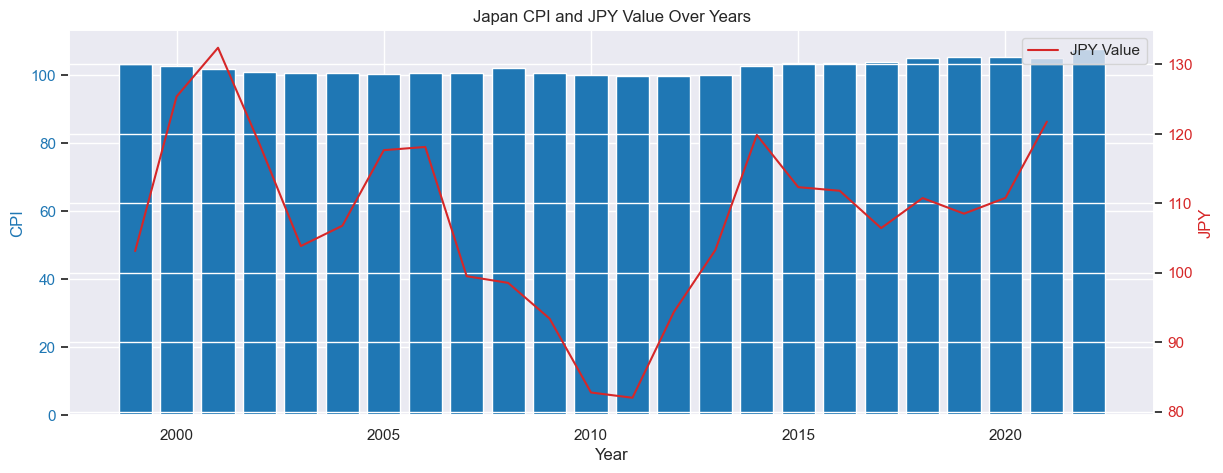

In [83]:
new_CPI_data_numeric = new_CPI_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

x1 = new_CPI_data_numeric.columns.values
x2 = final_data['Fiscal Year']
y1 = new_CPI_data_numeric.mean(axis=0)
y2 = final_data['JPY']

fig, ax1 = plt.subplots(figsize=(14, 5))

# JapanのCPIを棒グラフとしてプロット
color = 'tab:blue'
ax1.bar(x1, y1, color=color, label='Japan CPI', width=0.8)
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI', color=color)
ax1.tick_params(axis='y', which='major', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(x2, y2, color=color, label='JPY Value')
ax2.set_ylabel('JPY', color=color)
ax2.tick_params(axis='y', which='major', labelcolor=color)

plt.title('Japan CPI and JPY Value Over Years')
plt.legend()
plt.show()